In [1]:
import sys
sys.path.append('/source/main/')

In [2]:
import ast
import logging
logging.basicConfig(level=logging.INFO)

import pandas as pd
import matplotlib.pyplot as plt

from utils import text_utils
from preprocess import preprocessor

In [3]:
MAX_LENGTH = 100 

In [4]:
df_tag = pd.read_csv('/source/main/data_download/output/app_tags.csv')
df_tag_price = df_tag[df_tag['name'].map(lambda x: x.lower().find('price') != -1)]
price_ids = set(df_tag_price['id'])

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def add_price_label(df):
    df['tags'] = df['tags'].map(ast.literal_eval)
    df['label'] = df['tags'].map(lambda x: int(not price_ids.isdisjoint(x)))
    plt.figure()
    df['label'].value_counts().plot.pie()
    plt.show()
    return df

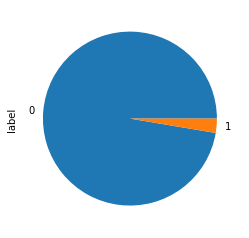

(461036, 5)


In [6]:
df_train = pd.read_csv('/source/main/data_for_train/output/train.csv')
df_train = add_price_label(df_train)
df_train.to_csv('/source/main/data_for_train/output/is_price/train.csv', index=None)
print(df_train.shape)

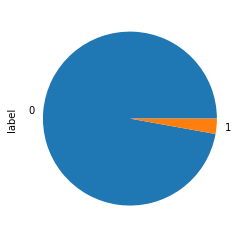

(10000, 5)


In [7]:
df_eval = pd.read_csv('/source/main/data_for_train/output/eval.csv')
df_eval = add_price_label(df_eval)
df_eval.to_csv('/source/main/data_for_train/output/is_price/eval.csv', index=None)
print(df_eval.shape)

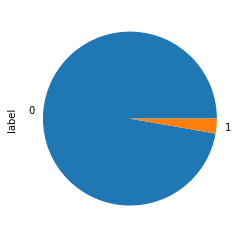

(10000, 5)


In [8]:
df_test = pd.read_csv('/source/main/data_for_train/output/test.csv')
df_test = add_price_label(df_test)
df_test.to_csv('/source/main/data_for_train/output/is_price/test.csv', index=None)
print(df_test.shape)